In [1]:
import pandas as pd
from datetime import date

In [2]:
import numpy as np, statsmodels, pandas as pd
print("Numpy:", np.__version__)
print("Statsmodels:", statsmodels.__version__)
print("Pandas:", pd.__version__)


Numpy: 1.26.4
Statsmodels: 0.14.2
Pandas: 2.2.3


In [3]:
import matplotlib, scipy
print("Matplotlib:", matplotlib.__version__)
print("Scipy:", scipy.__version__)


Matplotlib: 3.10.6
Scipy: 1.15.3


In [4]:
from nsepy import get_history as gh
import datetime as dt

In [5]:
import yfinance as yf
import datetime as dt

start = dt.datetime(2024,9,1)
end = dt.datetime(2025,9,26)

stk_data = yf.download("SBIN.NS", start=start, end=end)
print(stk_data.head())


C:\Users\Priyadharshini\AppData\Local\Temp\ipykernel_23252\3738660750.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stk_data = yf.download("SBIN.NS", start=start, end=end)
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker         SBIN.NS     SBIN.NS     SBIN.NS     SBIN.NS   SBIN.NS
Date                                                                
2024-09-02  805.966553  809.152579  797.045644  801.211986  11813750
2024-09-03  808.564392  809.691779  800.329776  805.966591  10548350
2024-09-04  800.427734  802.535437  797.633859  799.398415  10789570
2024-09-05  802.633484  805.966581  798.369135  802.241334   8395074
2024-09-06  767.097046  796.898668  761.705309  795.526202  40220096


In [6]:
stk_data


Price,Close,High,Low,Open,Volume
Ticker,SBIN.NS,SBIN.NS,SBIN.NS,SBIN.NS,SBIN.NS
Date,,,,,
2024-09-02,805.966553,809.152579,797.045644,801.211986,11813750
2024-09-03,808.564392,809.691779,800.329776,805.966591,10548350
2024-09-04,800.427734,802.535437,797.633859,799.398415,10789570
2024-09-05,802.633484,805.966581,798.369135,802.241334,8395074
2024-09-06,767.097046,796.898668,761.705309,795.526202,40220096
...,...,...,...,...,...
2025-09-19,862.349976,864.450012,849.299988,852.000000,15206426
2025-09-22,855.250000,868.200012,854.000000,862.000000,6594034


In [7]:
stk_data=stk_data[["Open","High","Low","Close"]]

In [8]:
stk_data

Price,Open,High,Low,Close
Ticker,SBIN.NS,SBIN.NS,SBIN.NS,SBIN.NS
Date,,,,
2024-09-02,801.211986,809.152579,797.045644,805.966553
2024-09-03,805.966591,809.691779,800.329776,808.564392
2024-09-04,799.398415,802.535437,797.633859,800.427734
2024-09-05,802.241334,805.966581,798.369135,802.633484
2024-09-06,795.526202,796.898668,761.705309,767.097046
...,...,...,...,...
2025-09-19,852.000000,864.450012,849.299988,862.349976
2025-09-22,862.000000,868.200012,854.000000,855.250000


In [9]:
column="Close"

In [10]:
#pip install scikit-learn


In [11]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1=Ms.fit_transform(stk_data[[column]])
print("Len:",data1.shape)

Len: (268, 1)


In [12]:
len(data1)

268

In [13]:
training_size=round(len(data1)*0.80)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train Length:",X_train.shape)
print("X_test Length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train Length:",y_train.shape)
print("y_test Length:",y_test.shape)


214
X_train Length: (214, 1)
X_test Length: (54, 1)
y_train Length: (214, 1)
y_test Length: (54, 1)


In [14]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [15]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg
from stockFunctions import rmsemape   # import once at the top

lags = [1, 2, 3, 4]
trends = ['n', 't', 'c', 'ct']

for i in lags:
    print(f"Testing Lag={i}")
    for td in trends:
        print(f"  Trend={td}")

        # build model
        model = AutoReg(X_train, lags=i, trend=td)
        model_fit = model.fit()

        # make predictions
        y_pred = model_fit.predict(len(X_train), len(data1)-1)

        # evaluate
        print(f"Lag={i}, Trend={td}")
        rmsemape(y_test, y_pred)
        print("***********")


Testing Lag=1
  Trend=n
Lag=1, Trend=n
RMSE-Testset: 0.19416705052189973
MAPE-Testset: 18.4911234063981
***********
  Trend=t
Lag=1, Trend=t
RMSE-Testset: 0.09599633970977281
MAPE-Testset: 11.440985932450294
***********
  Trend=c
Lag=1, Trend=c
RMSE-Testset: 0.19809256614447548
MAPE-Testset: 20.147797533819244
***********
  Trend=ct
Lag=1, Trend=ct
RMSE-Testset: 0.14273850077638095
MAPE-Testset: 12.977108946862275
***********
Testing Lag=2
  Trend=n
Lag=2, Trend=n
RMSE-Testset: 0.19842044902479566
MAPE-Testset: 18.98731962747298
***********
  Trend=t
Lag=2, Trend=t
RMSE-Testset: 0.09688976415826642
MAPE-Testset: 11.551116778640912
***********
  Trend=c
Lag=2, Trend=c
RMSE-Testset: 0.20202716885032207
MAPE-Testset: 20.79779357959968
***********
  Trend=ct
Lag=2, Trend=ct
RMSE-Testset: 0.1442361786819477
MAPE-Testset: 13.212150201390783
***********
Testing Lag=3
  Trend=n
Lag=3, Trend=n
RMSE-Testset: 0.17977505552453837
MAPE-Testset: 16.79301885457598
***********
  Trend=t
Lag=3, Trend=t

In [16]:
import sklearn
print("Sklearn version:", sklearn.__version__)
print("Sklearn file:", sklearn.__file__)


Sklearn version: 1.7.2
Sklearn file: C:\Users\Priyadharshini\anaconda3\envs\tsa_env\Lib\site-packages\sklearn\__init__.py


In [17]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error)
print(mean_squared_error.__module__)


<function mean_squared_error at 0x00000261C85B8400>
sklearn.metrics._regression


In [18]:
import importlib, stockFunctions
importlib.reload(stockFunctions)


<module 'stockFunctions' from 'D:\\Week 12- Time Series Analysis\\3.TS-Model\\1.AR\\stockFunctions.py'>

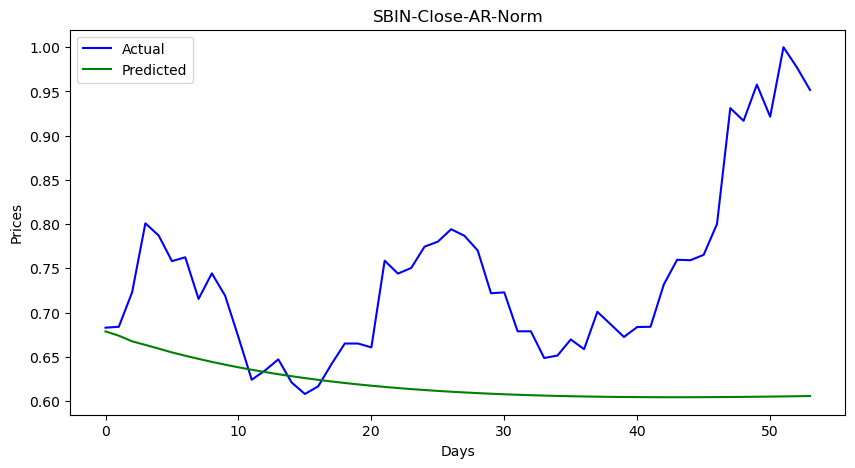

In [19]:
from stockFunctions import graph
graph(y_test, y_pred, "Actual", "Predicted", "SBIN-Close-AR-Norm", "Days", "Prices")


In [20]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(X_train, order=(5,1,0))
model_fit = model.fit()
y_pred = model_fit.forecast(len(y_test))

In [21]:
y_pred

array([0.68192884, 0.68298284, 0.67871284, 0.68071577, 0.68261368,
       0.68175776, 0.68197374, 0.68255362, 0.68212541, 0.68195177,
       0.68211433, 0.68202585, 0.68196139, 0.6820398 , 0.68204482,
       0.68202132, 0.68204204, 0.68204634, 0.6820339 , 0.68203645,
       0.68203896, 0.68203509, 0.68203545, 0.68203715, 0.68203633,
       0.68203621, 0.68203683, 0.68203662, 0.68203643, 0.6820366 ,
       0.68203657, 0.68203648, 0.68203653, 0.68203655, 0.68203652,
       0.68203653, 0.68203654, 0.68203653, 0.68203653, 0.68203654,
       0.68203653, 0.68203653, 0.68203653, 0.68203653, 0.68203653,
       0.68203653, 0.68203653, 0.68203653, 0.68203653, 0.68203653,
       0.68203653, 0.68203653, 0.68203653, 0.68203653])

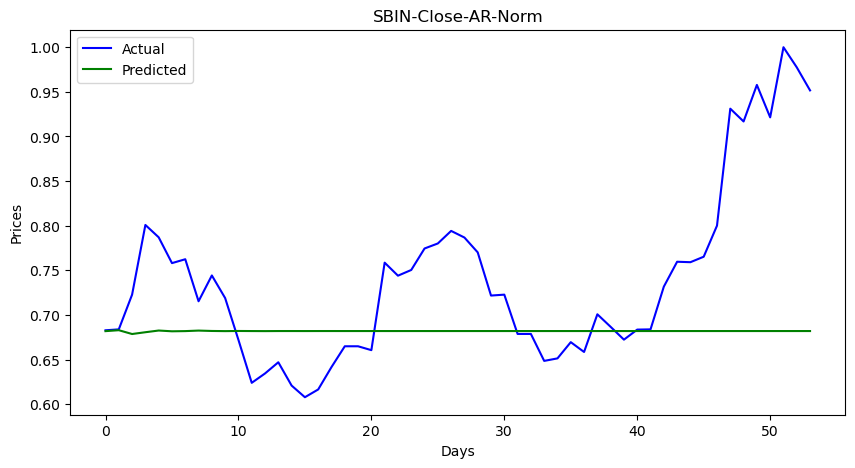

In [22]:
from stockFunctions import graph
graph(y_test, y_pred, "Actual", "Predicted", "SBIN-Close-AR-Norm", "Days", "Prices")

In [23]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(X_train)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -2.1300285903479788
p-value: 0.23261260630033337


In [24]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA with differencing
model = ARIMA(X_train, order=(5,1,0))  # p=5, d=1, q=0
model_fit = model.fit()
print(model_fit.summary())

# Predict
y_pred = model_fit.predict(len(X_train), len(data1)-1, typ='levels')


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  214
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 314.656
Date:                Sat, 27 Sep 2025   AIC                           -617.312
Time:                        12:42:17   BIC                           -597.144
Sample:                             0   HQIC                          -609.161
                                - 214                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0149      0.060      0.247      0.805      -0.104       0.133
ar.L2         -0.0695      0.070     -0.997      0.319      -0.206       0.067
ar.L3          0.0992      0.072      1.375      0.1

C:\Users\Priyadharshini\anaconda3\envs\tsa_env\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


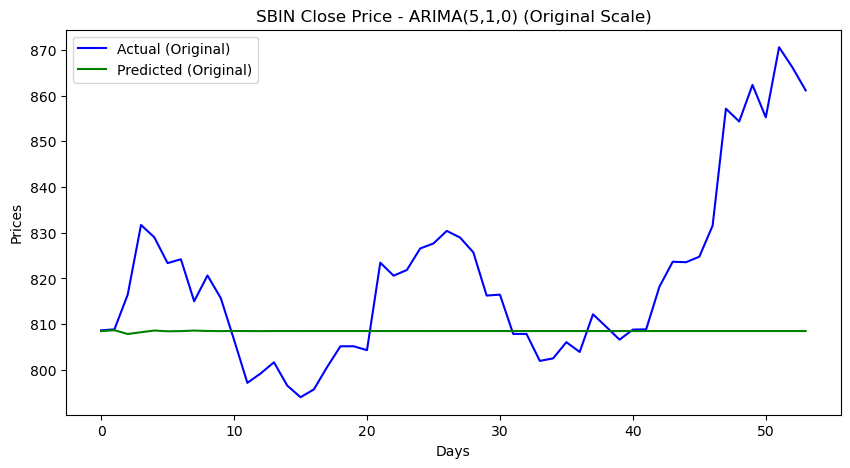

In [25]:
# Convert predictions back to original scale
import matplotlib.pyplot as plt

y_pred_orig = Ms.inverse_transform(y_pred.reshape(-1,1))
y_test_orig = Ms.inverse_transform(y_test.reshape(-1,1))

plt.figure(figsize=(10,5))
plt.plot(y_test_orig, label="Actual (Original)", color='blue')
plt.plot(y_pred_orig, label="Predicted (Original)", color='green')
plt.title("SBIN Close Price - ARIMA(5,1,0) (Original Scale)")
plt.xlabel("Days")
plt.ylabel("Prices")
plt.legend()
plt.show()


In [26]:
#pip install pmdarima


In [29]:
from pmdarima import auto_arima

stepwise_model = auto_arima(X_train, 
                            seasonal=True, m=12,   # 12 = monthly seasonality
                            start_p=1, start_q=1, max_p=5, max_q=5,
                            start_P=0, max_P=2, max_Q=2,
                            d=1, D=1, trace=True,
                            error_action='ignore', suppress_warnings=True, stepwise=True)

print(stepwise_model.summary())


C:\Users\Priyadharshini\anaconda3\envs\tsa_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Priyadharshini\anaconda3\envs\tsa_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.70 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-456.877, Time=0.02 sec


C:\Users\Priyadharshini\anaconda3\envs\tsa_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Priyadharshini\anaconda3\envs\tsa_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-509.573, Time=0.20 sec


C:\Users\Priyadharshini\anaconda3\envs\tsa_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.99 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-455.144, Time=0.04 sec


C:\Users\Priyadharshini\anaconda3\envs\tsa_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Priyadharshini\anaconda3\envs\tsa_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-514.744, Time=0.59 sec


C:\Users\Priyadharshini\anaconda3\envs\tsa_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.22 sec


C:\Users\Priyadharshini\anaconda3\envs\tsa_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.11 sec


C:\Users\Priyadharshini\anaconda3\envs\tsa_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-516.741, Time=0.30 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-511.355, Time=0.09 sec


C:\Users\Priyadharshini\anaconda3\envs\tsa_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Priyadharshini\anaconda3\envs\tsa_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=2.11 sec


C:\Users\Priyadharshini\anaconda3\envs\tsa_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.70 sec


C:\Users\Priyadharshini\anaconda3\envs\tsa_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,1,0)[12]             : AIC=-514.745, Time=0.46 sec


C:\Users\Priyadharshini\anaconda3\envs\tsa_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,1,0)[12]             : AIC=-512.745, Time=1.40 sec


C:\Users\Priyadharshini\anaconda3\envs\tsa_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=-514.811, Time=0.71 sec

Best model:  ARIMA(0,1,0)(2,1,0)[12]          
Total fit time: 11.668 seconds
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  214
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood                 261.371
Date:                            Sat, 27 Sep 2025   AIC                           -516.741
Time:                                    12:45:14   BIC                           -506.831
Sample:                                         0   HQIC                          -512.731
                                            - 214                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------

C:\Users\Priyadharshini\anaconda3\envs\tsa_env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Priyadharshini\anaconda3\envs\tsa_env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Priyadharshini\anaconda3\envs\tsa_env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(5,1,2) → RMSE: 21.830731020208606  MAPE: 1.8120687126129706 %
SARIMAX(0,1,0)(2,1,0,12) → RMSE: 16.831368794104897  MAPE: 1.6204661331378982 %


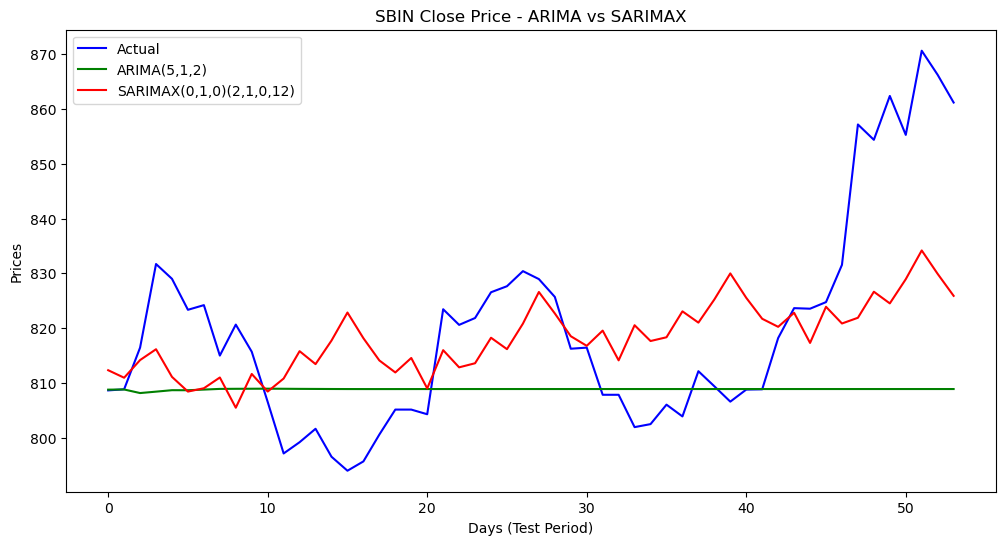

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# --- ARIMA (5,1,2) ---
arima_model = SARIMAX(X_train, order=(5,1,2), seasonal_order=(0,0,0,0))
arima_fit = arima_model.fit(disp=False)
y_pred_arima = arima_fit.predict(start=len(X_train), end=len(data1)-1)

# --- SARIMAX (0,1,0)(2,1,0,12) ---
sarimax_model = SARIMAX(X_train, order=(0,1,0), seasonal_order=(2,1,0,12))
sarimax_fit = sarimax_model.fit(disp=False)
y_pred_sarimax = sarimax_fit.predict(start=len(X_train), end=len(data1)-1)

# --- Inverse transform ---
y_pred_arima_orig = Ms.inverse_transform(y_pred_arima.reshape(-1,1))
y_pred_sarimax_orig = Ms.inverse_transform(y_pred_sarimax.reshape(-1,1))
y_test_orig = Ms.inverse_transform(y_test.reshape(-1,1))

# --- Metrics ---
rmse_arima = np.sqrt(mean_squared_error(y_test_orig, y_pred_arima_orig))
mape_arima = mean_absolute_percentage_error(y_test_orig, y_pred_arima_orig)*100

rmse_sarimax = np.sqrt(mean_squared_error(y_test_orig, y_pred_sarimax_orig))
mape_sarimax = mean_absolute_percentage_error(y_test_orig, y_pred_sarimax_orig)*100

print("ARIMA(5,1,2) → RMSE:", rmse_arima, " MAPE:", mape_arima, "%")
print("SARIMAX(0,1,0)(2,1,0,12) → RMSE:", rmse_sarimax, " MAPE:", mape_sarimax, "%")

# --- Plot ---
plt.figure(figsize=(12,6))
plt.plot(y_test_orig, label="Actual", color="blue")
plt.plot(y_pred_arima_orig, label="ARIMA(5,1,2)", color="green")
plt.plot(y_pred_sarimax_orig, label="SARIMAX(0,1,0)(2,1,0,12)", color="red")
plt.title("SBIN Close Price - ARIMA vs SARIMAX")
plt.xlabel("Days (Test Period)")
plt.ylabel("Prices")
plt.legend()
plt.show()


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR


In [4]:
import yfinance as yf

# Download SBI (ticker: SBIN.NS for NSE India)
sbi = yf.download("SBIN.NS", start="2023-01-01", end="2025-09-29")

print(sbi.head())


C:\Users\Priyadharshini\AppData\Local\Temp\ipykernel_7652\160450348.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sbi = yf.download("SBIN.NS", start="2023-01-01", end="2025-09-29")
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open   Volume
Ticker         SBIN.NS     SBIN.NS     SBIN.NS     SBIN.NS  SBIN.NS
Date                                                               
2023-01-02  578.999573  585.619953  578.053804  581.600437  6726084
2023-01-03  579.188721  583.160903  576.918853  581.174812  6818062
2023-01-04  572.379150  581.600394  571.244217  578.668477  7011191
2023-01-05  572.284546  578.432042  569.305410  574.081529  8241475
2023-01-06  568.075928  574.507143  564.623849  574.459866  7972036


In [50]:
# Step 1: Select OHLC
ohlc = sbi[["Open", "High", "Low", "Close"]]

# Step 2: Flatten column names
ohlc.columns = ["Open", "High", "Low", "Close"]

# Step 3: Fill missing values
ohlc = ohlc.ffill().bfill()

# Step 4: Train/Test split (last 10 days for test)
train = ohlc[:-10]
test  = ohlc[-10:]


In [51]:
ohlc=ohlc.ffill().bfill()

In [52]:
train_size=int(len(ohlc)*0.9)
train=ohlc.iloc[:train_size]
test=ohlc.iloc[train_size:]

In [53]:
from statsmodels.tsa.api import VAR
model = VAR(train)
fitted_model = model.fit(maxlags=15, ic="aic")

C:\Users\Priyadharshini\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [54]:

fitted_model.k_ar


2

In [55]:
lag_order = fitted_model.k_ar
print("Selected lag order:", lag_order)


Selected lag order: 2


In [56]:
forecast_input = train.values[-lag_order:]

steps = len(test)
forecast = fitted_model.forecast(y=forecast_input, steps=steps)


In [57]:
forecast_df = pd.DataFrame(
    forecast, 
    index=test.index, 
    columns=train.columns
)


In [58]:
forecast_df

,Open,High,Low,Close
Date,,,,
2025-06-24,791.036067,797.906498,787.897868,793.070393
2025-06-25,793.470007,799.622951,785.805058,791.612546
2025-06-26,792.267532,798.922738,783.978627,790.908436
2025-06-27,791.832169,799.044849,783.294934,790.711484
2025-06-30,791.706109,799.066511,782.808790,790.508254
...,...,...,...,...
2025-09-22,789.957375,797.538875,780.766309,788.795776
2025-09-23,789.934072,797.515292,780.743351,788.772549
2025-09-24,789.910848,797.491789,780.720471,788.749401


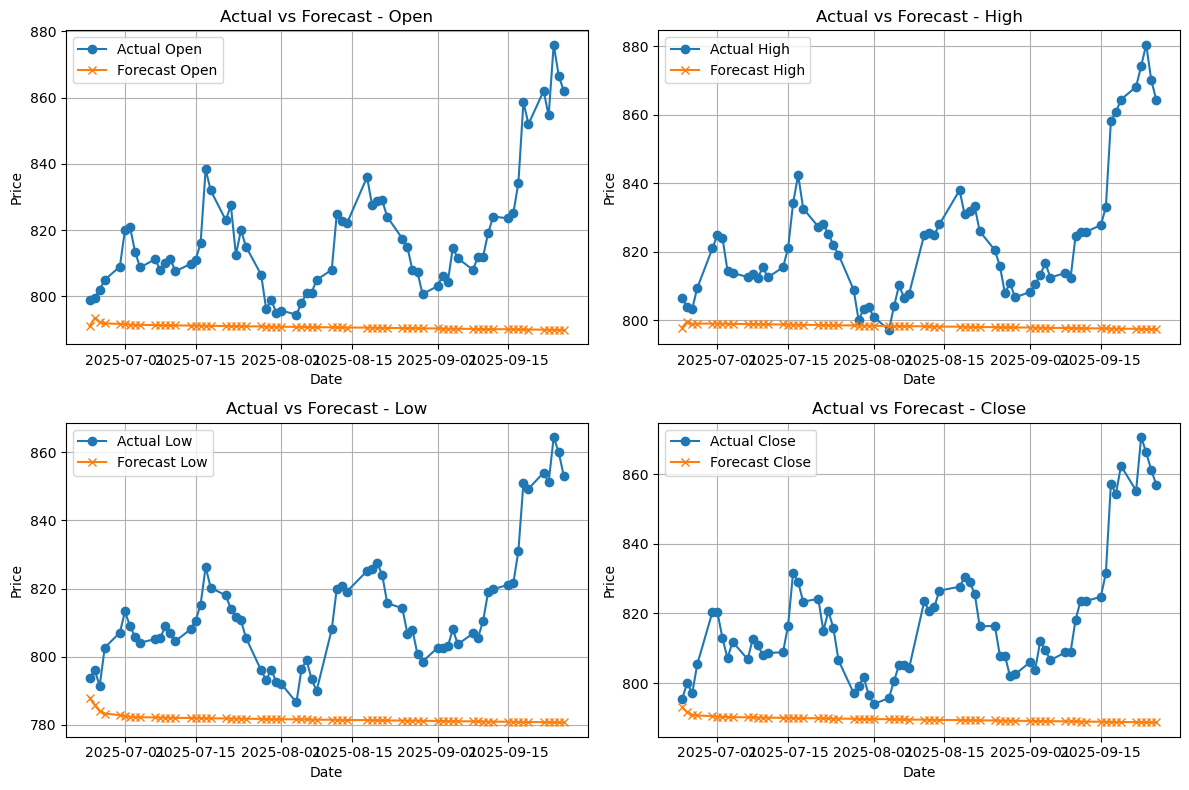

In [59]:
import matplotlib.pyplot as plt

# List of columns to plot
columns = ["Open", "High", "Low", "Close"]

plt.figure(figsize=(12,8))

for i, col in enumerate(columns, 1):
    plt.subplot(2, 2, i)  # 2 rows, 2 cols, position i
    plt.plot(test.index, test[col], label=f"Actual {col}", marker="o")
    plt.plot(forecast_df.index, forecast_df[col], label=f"Forecast {col}", marker="x")
    plt.title(f"Actual vs Forecast - {col}")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# MAE
mae = mean_absolute_error(test, forecast_df)

# RMSE
rmse = np.sqrt(mean_squared_error(test, forecast_df))

# MAPE
mape = np.mean(np.abs((test - forecast_df) / test)) * 100

print("MAE :", mae)
print("RMSE:", rmse)
print("MAPE:", mape)


MAE : 28.02820190254309
RMSE: 33.72340281375232
MAPE: 3.3795063477017337


In [61]:
from statsmodels.tsa.stattools import adfuller

# Example: test stationarity for 'Close'
result = adfuller(train["Close"])
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -1.0459107801350456
p-value: 0.7361534738177586


In [66]:
# --- Step 1: Fit VAR on differenced train ---
model = VAR(train_diff)
fitted_model = model.fit(maxlags=15, ic="aic")
lag_order = fitted_model.k_ar
print("Selected Lag Order:", lag_order)

# --- Step 2: Prepare forecast input (last lag_order rows from train_diff) ---
forecast_input = train_diff.values[-lag_order:]

# --- Step 3: Forecast on differenced data ---
forecast_diff = fitted_model.forecast(y=forecast_input, steps=len(test_diff))

# --- Step 4: Convert forecasted differences to DataFrame (last 10 dates only) ---
forecast_df = pd.DataFrame(
    forecast_diff,
    index=test.index[-len(test_diff):],   # align with last 10 test dates
    columns=["Open", "High", "Low", "Close"]
)

# --- Step 5: Invert differencing to get back actual prices ---
last_known = train.iloc[-1]    # last known actual prices before forecast
forecast_df = forecast_df.cumsum() + last_known.values

# --- Step 6: Ensure test has the same columns (fix if needed) ---
test = test[["Open", "High", "Low", "Close"]]
test.columns = ["Open", "High", "Low", "Close"]

# --- Step 7: Combine Actual vs Forecast for the last 10 days ---
comparison = pd.concat(
    [test[-len(test_diff):], forecast_df],
    axis=1,
    keys=["Actual", "Forecast"]
)

print(comparison)


Selected Lag Order: 8
                Actual                                        Forecast  \
                  Open        High         Low       Close        Open   
Date                                                                     
2025-09-15  823.549988  827.799988  821.099976  824.750000  790.670161   
2025-09-16  825.099976  833.000000  821.650024  831.549988  790.830001   
2025-09-17  834.299988  858.150024  831.000000  857.150024  790.422161   
2025-09-18  858.650024  860.799988  851.099976  854.349976  790.706544   
2025-09-19  852.000000  864.450012  849.299988  862.349976  790.907026   
2025-09-22  862.000000  868.200012  854.000000  855.250000  790.773044   
2025-09-23  854.599976  874.250000  851.200012  870.599976  790.812725   
2025-09-24  876.000000  880.500000  864.450012  866.200012  791.574430   
2025-09-25  866.549988  870.150024  859.950012  861.150024  791.789320   
2025-09-26  862.000000  864.349976  853.000000  856.950012  792.061836   

               

C:\Users\Priyadharshini\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [67]:
fitted_model = model.fit(maxlags=5)


In [68]:
ohlc_returns = ohlc.pct_change().dropna()


In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
# Align Actual and Forecast (just to be safe)
actual = test[-len(forecast_df):][["Open", "High", "Low", "Close"]]
pred   = forecast_df[["Open", "High", "Low", "Close"]]

# MAE
mae = mean_absolute_error(actual, pred)

# RMSE
rmse = np.sqrt(mean_squared_error(actual, pred))

# MAPE
mape = np.mean(np.abs((actual - pred) / actual)) * 100

print("MAE :", mae)
print("RMSE:", rmse)
print("MAPE:", mape)


MAE : 60.28981190251848
RMSE: 62.24845697047114
MAPE: 7.03749967993467


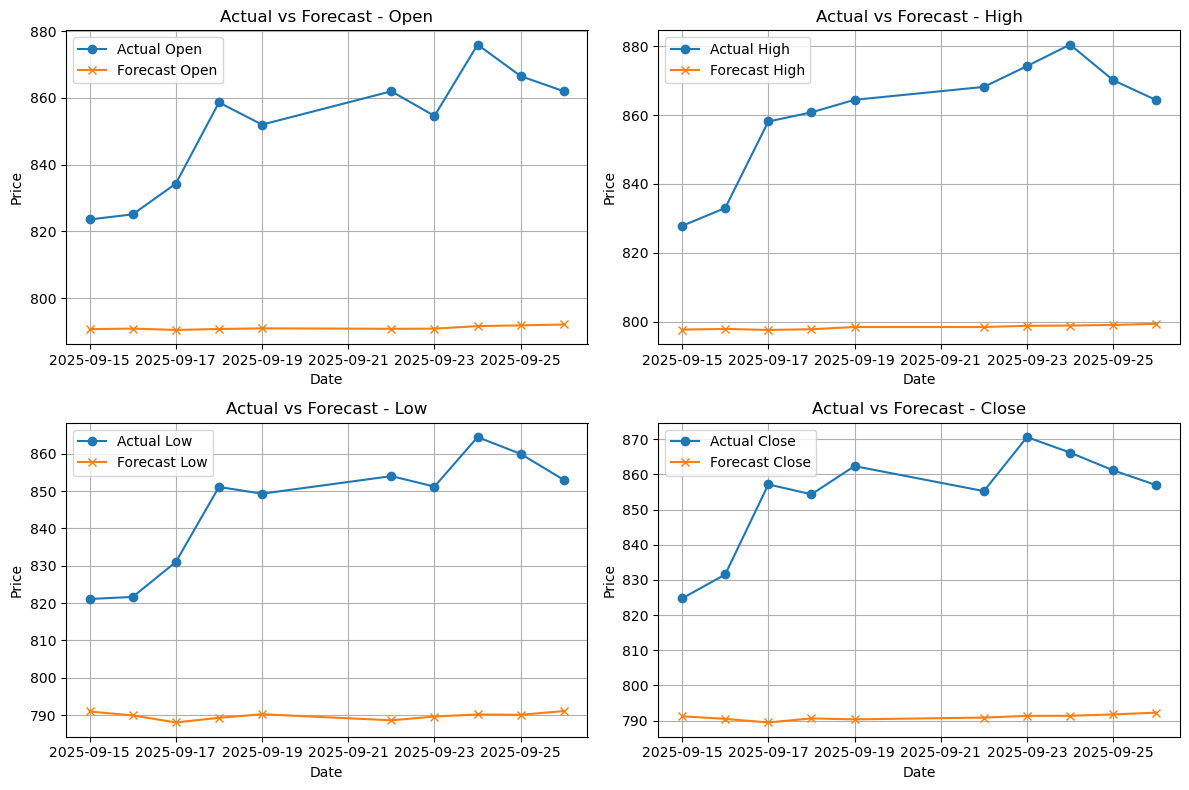

In [71]:
import matplotlib.pyplot as plt

# Columns to plot
columns = ["Open", "High", "Low", "Close"]

plt.figure(figsize=(12,8))

for i, col in enumerate(columns, 1):
    plt.subplot(2, 2, i)   # 2 rows, 2 columns, subplot i
    plt.plot(actual.index, actual[col], label=f"Actual {col}", marker="o")
    plt.plot(pred.index, pred[col], label=f"Forecast {col}", marker="x")
    plt.title(f"Actual vs Forecast - {col}")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()
